# TTRC Demo
- Run this with the same scan settings as the WTRC to see the topological-temporal rich club effect in the same network

In [1]:
# Import necessary libraries and modules
import sys
sys.path.append('.')  # Add the current directory to the system path for imports
from wtrc import *  # Import the required module(s)

# Define the Args class to encapsulate arguments
class Args:
    def __init__(self):
        # Define file paths and prefixes
        self.path_prefix = './output/'  # Path prefix for saving files
        self.npy_file = 'TTRC_wict'  # Numpy file name for saving results
        self.save_file = 'TTRC_wict'  # File name for output
        self.data_dir = ''  # Directory for input data
        self.data_file = "WICTs_allyears.csv"  # Input data file

        # Experiment parameters
        self.testing = 'False'  # Enable/disable testing mode
        self.k_divisor = 8  # Number of unique degrees used in analysis
        self.shuffle = 3  # Number of randomization shuffles
        self.ti = 0  # Initial time index
        self.t = self.ti + 155  # End time index; max in this dataset is 155
        self.d_step = 8  # Number of unique deltas to use
        self.network_type = 'topological'  # Type of network (weighted/topological)
        self.weighted_degree = 'False'  # Whether to use weighted degree
        self.norm = 'og'  # Normalization type
        self.randomize = '123'  # Randomization seed
        self.date = '042924'  # Date identifier for outputs
        self.district = 2  # District number for analysis
        self.just_sequence = 'False'  # Whether to use sequence-only mode
        self.pool = 25 # number of works to use for parallel processing

In [2]:
# Instantiate the Args class
args = Args()

# Print outputs for verification
print("Save file:", args.save_file)
print("Data file:", args.data_file)
print("Number of unique deltas to be used:", args.d_step)
print("Number of unique richness thresholds to be used:", args.k_divisor)

Save file: TTRC_wict
Data file: WICTs_allyears.csv
Number of unique deltas to be used: 8
Number of unique richness thresholds to be used: 8


### Overview of all districts - the notebook can analyze one of them at a time

ERROR 1: PROJ: proj_create_from_database: Open of /media/raid/jkruse/anaconda3/envs/trc_env/share/proj failed


<Figure size 300x200 with 0 Axes>

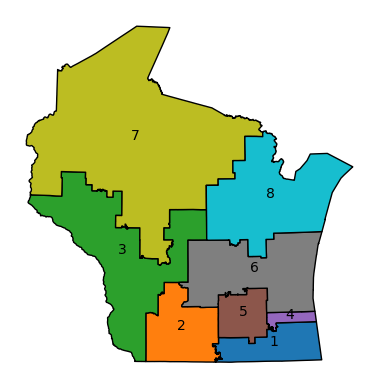

In [3]:
district_boundaries = plot_cong_districts()

All edge weights are set to 1:

In [4]:
flows_df, max_ind = process_flows_df(args)

Network type = topological
Actual number of unique timesteps: 155
Since network_type == topological, weights have been set to 1
(13100144, 7)
(13100144, 7)
Len of flows_df = 13100144.... = number of edges across all timesteps
number of unique flows_df.i = 1394
number of unique flows_df.j = 1394


### Filter down the census tracts to those that are within the district boundary

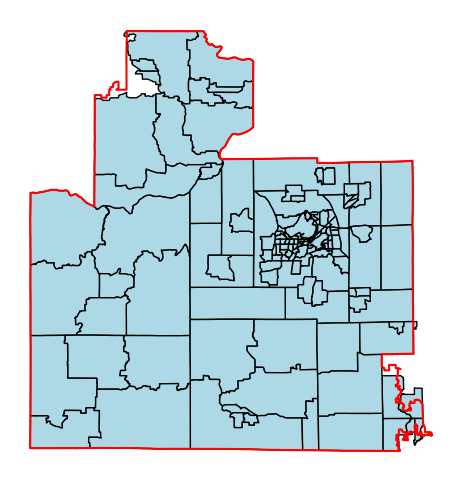

Count of CTs within boundary: 148
Count of geometries in filtered_flows_df: 148


In [5]:
flows_df_filtered, node_geoid_dict, boundary, filtered_cts = filter_flows_to_district(flows_df, args.district)

### Make graphs, including randomized graphs (null models)
- The TTRC uses edge swapping to randomize the topology
- Weight decorrelation is not used, as all the edge weights have been set to 1

In [6]:
graphs_array = load_data(flows_df_filtered, max_ind, args)

starting to produce graphs
time taken (min) to run loop part of produce_graphs() = 0.1263776183128357
time taken (min) to create aggregate network in produce_graphs() = 0.07793972492218018
edge and node count of OG graph, prior to randomization:
[(10613, 148)] 

edge and node counts prior to randomization:
[(10613, 148)] 

starting randomization...

starting topoTempRandomization...
starting topoTempRandomization...
starting topoTempRandomization...
Finished sequence_shuffling(graphs_list)
Using edge swapping for randomization
Finished sequence_shuffling(graphs_list)
Using edge swapping for randomization
Finished sequence_shuffling(graphs_list)
Using edge swapping for randomization
total time (mins) to produce all graphs = 7.652856969833374


### Calculate WTRC values for original graph and null models
- Use parallel processing and chunking to speed up calculation

In [7]:
RC_matrices,RC_maxTs_matrices,RC_geoids_matrices = calculate_rc_matrices(flows_df_filtered, graphs_array, args)

Calculating steps based on original graph, NOT randomized graphs.
Using temporal edge count for richness sequence
overriding ds and ks for airport:
d_min = 5,
d_max = 153,
d_step = 21

k_min = 100, k_max = 19886
ks = [100, 2585, 5070, 7555, 10040, 12525, 15010, 17495]
all_deltas = [5, 26, 47, 68, 89, 110, 131, 152]
Processed chunk 1/13 for loop_count = 0
Processed chunk 2/13 for loop_count = 0
Processed chunk 3/13 for loop_count = 0
Processed chunk 4/13 for loop_count = 0
Processed chunk 5/13 for loop_count = 0
Processed chunk 6/13 for loop_count = 0
Processed chunk 7/13 for loop_count = 0
Processed chunk 8/13 for loop_count = 0
Processed chunk 9/13 for loop_count = 0
Processed chunk 10/13 for loop_count = 0
Processed chunk 11/13 for loop_count = 0
Processed chunk 12/13 for loop_count = 0
Processed chunk 13/13 for loop_count = 0
Completed processing for graphs_list 1 at 2024-12-04 22:49:22.627273
Processed chunk 1/13 for loop_count = 1
Processed chunk 2/13 for loop_count = 1
Processed 

In [8]:
og_matrix, RCs_array, data_new_maxTs, mean_matrix, RC_norm, RC_geoids_matrices = load_and_process_data(args)
result_tup = process_and_visualize_data(args)
RC_norm, list_of_M_s_mats, og_matrix, max_values_adjusted, max_values_adjusted_masked = result_tup
RC_norm, list_of_M_s_mats, og_matrix, max_values_adjusted, max_values_adjusted_masked = process_and_visualize_data(args)

Keys in the npz file: ['M_s_mat0', 'M_s_mat1', 'M_s_mat2', 'M_s_mat3']
Keys in the npz file: ['M_s_mat0', 'M_s_mat1', 'M_s_mat2', 'M_s_mat3']


/media/raid/jkruse/Temporal-Rich-Club/Human_Mobility_Flows/WTRC/wtrc.py:1068: RuntimeWarning: Mean of empty slice
  averages = np.nanmean(averages, axis=0)


In [9]:
max_index_flat = np.argmax(RC_norm)
# Convert the flat index to row and column indices
max_index_row_col = np.unravel_index(max_index_flat, RC_norm.shape)
max_index_row_col

(0, 4)

In [10]:
max_t_start = int(data_new_maxTs[0][max_index_row_col])
max_t_start

20

### Get the scan settings to use them for plotting

In [11]:
deltas, ks, d_step = set_ds_ks_ALL(flows_df, graphs_array, args, args.weighted_degree)
len(deltas), len(ks)

Calculating steps based on original graph, NOT randomized graphs.
Using temporal edge count for richness sequence
overriding ds and ks for airport:
d_min = 5,
d_max = 153,
d_step = 21

k_min = 100, k_max = 19886
ks = [100, 2585, 5070, 7555, 10040, 12525, 15010, 17495]
all_deltas = [5, 26, 47, 68, 89, 110, 131, 152]


(8, 8)

### Plot TTRC scan results
- The TTRC results are all close to 1 (meaning little to no TTRC effect), while the WTRC scan (in the other notebook) shows strong WTRC effects across various settings
    - The differences between the TTRC and WTRC help distinguish between topological-temporal and weighted-temporal rich club effects

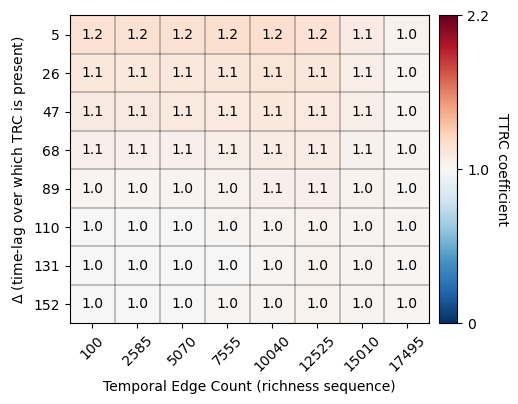

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Replace infinities and NaNs
RC_norm = np.nan_to_num(RC_norm, nan=-99)
RC_norm_masked = np.ma.masked_where(RC_norm == -99, RC_norm)

# Create a custom colormap and set the 'bad' value color
cmap = cm.RdBu_r.copy()
cmap.set_bad('grey')

# Normalization
norm = TwoSlopeNorm(vmin=0, vcenter=1.0, vmax=2.2)

# Create the plote
size = 4
fig, ax = plt.subplots(figsize=(1.25*size, 1*size))
im = ax.imshow(RC_norm_masked, cmap=cmap, norm=norm, aspect='auto')  # Using 'auto' aspect

# Setting the x and y ticks to the borders of each cell
ax.set_xticks(np.arange(len(ks)) - 0.5, minor=True)
ax.set_yticks(np.arange(len(deltas)) - 0.5, minor=True)

# Grid lines based on minor ticks
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.33)
ax.tick_params(which="minor", size=0)

# Setting the x and y major tick labels
ax.set_xticks(np.arange(len(ks)))
ax.set_yticks(np.arange(len(deltas)))
ax.set_xticklabels(ks, rotation=45)
ax.set_yticklabels(deltas)

# Loop over data dimensions and create text annotations for cell values
for i in range(len(deltas)):
    for j in range(len(ks)):
        ax.text(j, i, f'{RC_norm_masked[i, j]:.1f}', 
                ha="center", va="center", color="black")

ax.set_ylabel(r'$\Delta$ (time-lag over which TRC is present)')
ax.set_xlabel('Temporal Edge Count (richness sequence)')  

# Create a divider for the existing axes instance
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes("right", size="5%", pad=0.1)

# Create the colorbar in the new axes
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[0, 1.0, 2.2])
cbar.ax.set_yticklabels(['0', '1.0', '2.2'])
cbar.ax.set_ylabel(r'TTRC coefficient', rotation=-90, va="bottom")

# Save and show the plot
path = f'{args.path_prefix}{args.date}_{args.npy_file}_{args.shuffle}_{args.network_type}_dis{args.district}_RCS.png'
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

# Plot some selected delta durations

In [13]:
deltas = [5, 68, 152]
delta_indices = [0,3,-1]

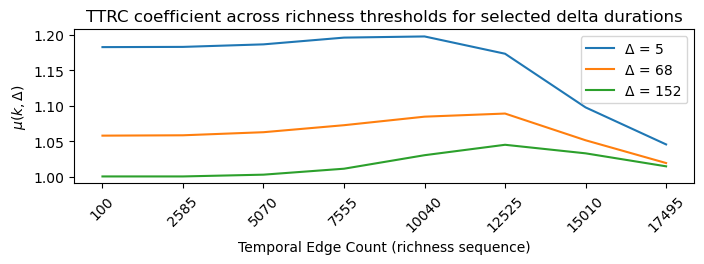

In [14]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 2))  # Adjusted figsize

# The 'k' values should be the same for each 'delta' and should be a list or array
k_values = [k for k in ks]
k_indices = [i for i in k_values]
# Plot the line for each delta
for i, delta in enumerate(delta_indices):
    plt.plot(k_values, RC_norm[delta], label=f'Δ = {deltas[i]}')

# Set the x-ticks and labels
ax.set_xticks(k_values)  # Set the x-ticks to match k_values
ax.set_xticklabels([str(k) for k in k_values], rotation=45, ha="center")  # Set the labels with rotation for readability

# Optionally, set the x minor ticks if needed
ax.set_xticks(np.arange(min(k_values), max(k_values)+1, (max(k_values)-min(k_values))/(len(k_values)-1)), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.33)
ax.tick_params(which="minor", size=0)  # Hide the minor ticks (optional)

# Add labels and title
plt.title('TTRC coefficient across richness thresholds for selected delta durations')
plt.xlabel('Temporal Edge Count (richness sequence)')  
plt.ylabel(r'$\mu(k, \Delta)$')  # Use LaTeX formatted text for the y-axis label
plt.legend()

path = f'{args.path_prefix}{args.date}_{args.npy_file}_{args.shuffle}_{args.network_type}_dis{args.district}_lineplot.png'
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

# Plot static rich club (aggregate graph)
- use temporal edge count in aggregate graph

In [15]:
def WRC(all_agg_graphs, k):
    AggG = all_agg_graphs[0]
    degrees = [(n, AggG.nodes[n]['node_id'], AggG.nodes[n]['geoid'], d) for n, d in AggG.degree(weight='temp_edge_count')]
    # Identify rich nodes and geoids
    wrcs = []
    rich_nodes = [node_id for node, node_id, geoid, degree in degrees if degree > k]
    rich_geoids = [geoid for node, node_id, geoid, degree in degrees if degree > k]
    size_Sk = len(rich_nodes)
    # Only proceed if we have enough rich nodes
    if size_Sk >= 3:
        for g in all_agg_graphs:
            # Calculate subgraph sizes at each timestep once
            agg_size = g.subgraph(rich_nodes).size(weight='weight')
            wrcs.append(agg_size)
    
    average_of_others = sum(wrcs[1:]) / (len(wrcs) - 1)
    # Divide the first element by this average
    wrc_k_norm = wrcs[0] / average_of_others
    return wrc_k_norm

In [16]:
og_graphs_list, og_agg = graphs_array[0]
static_agg_graphs = [og_agg for i in range(100)]
randomized_static_agg_graphs = []
for i in range(len(static_agg_graphs)):
    G_ran = preserve_strength_G(i, static_agg_graphs[i])
    randomized_static_agg_graphs.append(G_ran)

In [17]:
all_agg_graphs = [og_agg]+randomized_static_agg_graphs
normalized_wrc_per_k = []
for k in ks:
    normalized_wrc_per_k.append(WRC(all_agg_graphs, k))

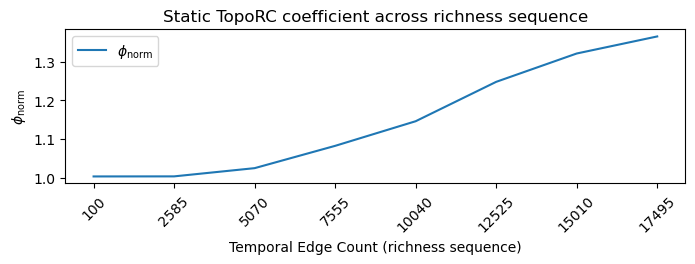

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 2))  # Adjusted figsize

# Example 'k' values and normalized WRC values
k_values = ks  # Replace with your actual data
normalized_wrc_per_k = normalized_wrc_per_k  # Replace with your actual data

# Plot the line for normalized WRC values
plt.plot(k_values, normalized_wrc_per_k, label=r'$\phi_{\text{norm}}$')

# Set the x-ticks and labels
ax.set_xticks(k_values)  # Set the x-ticks to match k_values
ax.set_xticklabels([str(k) for k in k_values], rotation=45, ha="center")  # Set the labels with rotation for readability

# Optionally, set the x minor ticks if needed
ax.set_xticks(
    np.arange(min(k_values), max(k_values)+1, (max(k_values)-min(k_values))/(len(k_values)-1)),
    minor=True
)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.33)
ax.tick_params(which="minor", size=0)  # Hide the minor ticks (optional)

# Add labels and title
plt.title('Static TopoRC coefficient across richness sequence')
plt.xlabel('Temporal Edge Count (richness sequence)')  
plt.ylabel(r'$\phi_{\text{norm}}$')  # Use LaTeX formatted text for the y-axis label

# Add a legend
plt.legend()

# Save the plot
path = f'{args.path_prefix}{args.date}_{args.npy_file}_{args.shuffle}_{args.network_type}_dis{args.district}_STATIC_lineplot.png'
plt.savefig(path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### The static topological rich club overestimates the rich club effect that was present at the higher richness levels for a given delta duration

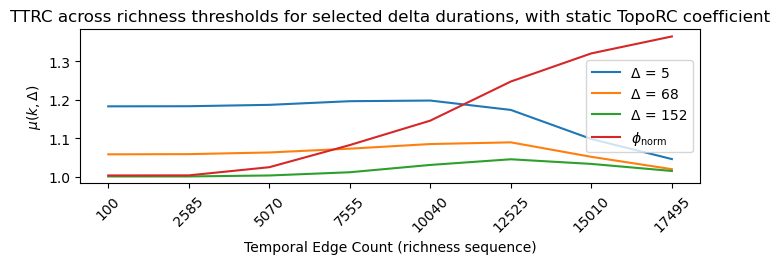

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 2))  # Adjusted figsize
k_values = ks
k_indices = [i for i in k_values]

# Plot the line for each delta
for i, delta in enumerate(delta_indices):
    plt.plot(k_values, RC_norm[delta], label=f'Δ = {deltas[i]}')

plt.plot(k_values, normalized_wrc_per_k, label=r'$\phi_{\text{norm}}$')

# Set the x-ticks and labels
ax.set_xticks(k_values)  # Set the x-ticks to match k_values
ax.set_xticklabels([str(k) for k in k_values], rotation=45, ha="center")  # Set the labels with rotation for readability

# Optionally, set the x minor ticks if needed
ax.set_xticks(np.arange(min(k_values), max(k_values)+1, (max(k_values)-min(k_values))/(len(k_values)-1)), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.33)
ax.tick_params(which="minor", size=0)  # Hide the minor ticks (optional)


# Add labels and title
plt.title('TTRC across richness thresholds for selected delta durations, with static TopoRC coefficient')
plt.xlabel('Temporal Edge Count (richness sequence)')  
plt.ylabel(r'$\mu(k, \Delta)$')  # Use LaTeX formatted text for the y-axis label
plt.legend()

path = f'{args.path_prefix}{args.date}_{args.npy_file}_{args.shuffle}_{args.network_type}_dis{args.district}_lineplot.png'
plt.savefig(path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Plot max t's

In [20]:
delta_indices

[0, 3, -1]

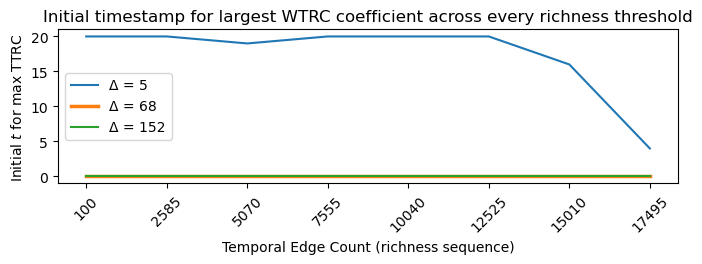

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 2))  # Adjusted figsize

for i, delta in enumerate(delta_indices):
    if i == 1:  # Check if it's the second line (index 1)
        plt.plot(k_values, data_new_maxTs[0][delta], label=f'Δ = {deltas[i]}', linewidth=2.5)  # Thicker line, to make it visible behind the other line
    else:
        plt.plot(k_values, data_new_maxTs[0][delta], label=f'Δ = {deltas[i]}')  # Default line width

# Set the x-ticks and labels
ax.set_xticks(k_values)  # Set the x-ticks to match k_values
ax.set_xticklabels([str(k) for k in k_values], rotation=45, ha="center")  # Set the labels with rotation for readability

# Optionally, set the x minor ticks if needed
ax.set_xticks(np.arange(min(k_values), max(k_values)+1, (max(k_values)-min(k_values))/(len(k_values)-1)), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.33)
ax.tick_params(which="minor", size=0)  # Hide the minor ticks (optional)


# Add labels and title
plt.title('Initial timestamp for largest WTRC coefficient across every richness threshold')
plt.xlabel('Temporal Edge Count (richness sequence)')   
plt.ylabel(r'Initial $t$ for max TTRC')  # Use LaTeX formatted text for the y-axis label
# plt.title('RC_norm vs. k for different Δ')
plt.legend()

path = f'{args.path_prefix}{args.date}_{args.npy_file}_{args.shuffle}_{args.network_type}_dis{args.district}_lineplot_Ts.png'
plt.savefig(path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Plot members of richest club

In [22]:
RC_geoids_matrices.shape

(4, 8, 8)

In [23]:
max_index_row_col, max_index_flat

((0, 4), 4)

In [24]:
row_index, column_index = max_index_row_col
matrix_index =  0 # orginal one
rich_geoids_max_trc = RC_geoids_matrices[matrix_index, row_index, column_index]

In [25]:
row_i = 0 # doesn't matter which row, as rich club members are the same in the original graph and in the randomized graphs
rich_club_geoids = RC_geoids_matrices[matrix_index, row_i, :]

Rich club members shown in dark green; non-rich club members shown in light green
These are the same as in the WTRC, since the TTRC and WTRC need to be compared across the same richness thresholds


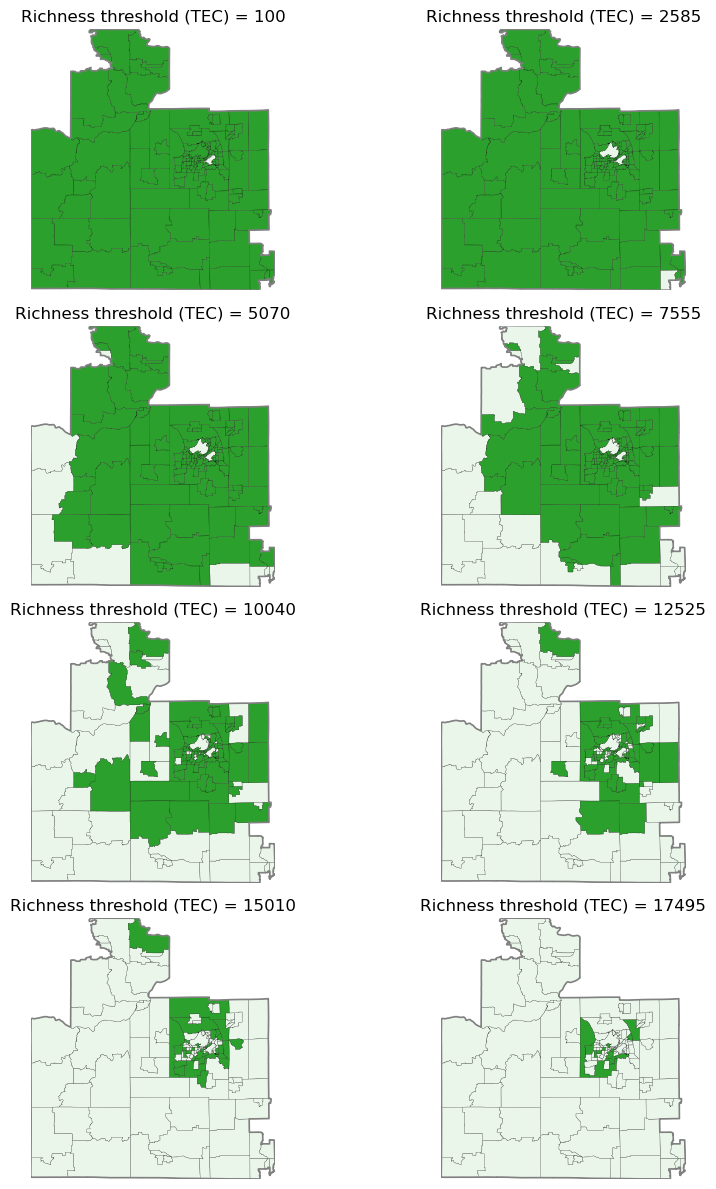

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math

# Function to adjust lightness of a color
def adjust_lightness(color, amount=0.5):
    """Adjust the lightness of the given color."""
    c = mcolors.to_rgb(color)
    c = np.array(c)
    c = np.clip((1 - amount) * c + amount, 0, 1)
    return tuple(c)

# Function to plot districts with rich club members
def plot_district_with_rich_club(ax, filtered_cts, rich_club_geoids, district_num, lightness_factor=0.9):
    """
    Plot a specific district with rich club members.

    Parameters:
    - ax: Matplotlib axis to plot on.
    - filtered_cts: GeoDataFrame with filtered census tracts.
    - rich_club_geoids: List of rich club GEOIDs for the district.
    - district_num: District number to plot.
    - lightness_factor: Lightness adjustment for non-rich club tracts.
    """
    # Filter for the specified district
    filtered_cts['District'] = args.district
    district_cts = filtered_cts[filtered_cts['District'] == district_num].copy()

    # Identify rich club members
    district_cts['RichClub'] = district_cts['GEOID20'].isin(rich_club_geoids)
    rich_club_cts = district_cts[district_cts['RichClub']]
    non_rich_club_cts = district_cts[~district_cts['RichClub']]

    # Define base and lighter colors
    district_colors = plt.get_cmap("tab10")
    base_color = district_colors(district_num % 10)
    lighter_color = adjust_lightness(base_color, amount=lightness_factor)

    # Plot non-rich club tracts
    non_rich_club_cts.plot(ax=ax, color=lighter_color, edgecolor='black', linewidth=0.15)

    # Plot rich club tracts
    rich_club_cts.plot(ax=ax, color=base_color, edgecolor='black', linewidth=0.15)

    # Add district boundary
    district_boundary = gpd.GeoSeries(district_cts.unary_union)
    district_boundary.plot(ax=ax, color='none', edgecolor='grey', linewidth=1.2)

    # Set plot limits to zoom into the district
    minx, miny, maxx, maxy = district_boundary.total_bounds
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    # Turn off axes
    ax.axis('off')
    ax.set_title(f"Richness threshold (TEC) = {ks[i]}")

# Iterate through each subarray in rich_club_geoids and create a grid of plots
district_num = 2  # Specify the district number for all subarrays
num_subarrays = len(rich_club_geoids)
num_cols = 2  # Number of columns
num_rows = math.ceil(num_subarrays / num_cols)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes for easier indexing

for i, subarray in enumerate(rich_club_geoids):
    plot_district_with_rich_club(
        ax=axes[i],
        filtered_cts=filtered_cts,
        rich_club_geoids=subarray,
        district_num=district_num,
        lightness_factor=0.9
    )

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

print('Rich club members shown in dark green; non-rich club members shown in light green')
print('These are the same as in the WTRC, since the TTRC and WTRC need to be compared across the same richness thresholds')
plt.show()

# Richness property and randomization validation
- In order to compare the original graphs to the randomized graphs, they must all the same richness sequence (in the aggregate graph)
- Validate that the distribution of the richness property stays the same in the randomized graph
    - In this case, we use weight decorrelation to randomize the weight allocation

### Produce the time-aggregate graph

In [27]:
AGGs_list = []
AGGs_degrees = []
degrees_nodes = []
for tup in graphs_array:
    graphs_list_ = tup[0]
    AGG_ = nx.Graph()
    for gt in graphs_list_:
        AGG_ = update_edge_weights(AGG_, gt)
    AGGs_list.append(AGG_)
    degrees_nodes.append([(n,int(d)) for n, d in AGG_.degree(weight='weight')])
    degrees = [int(d) for n, d in AGG_.degree(weight='weight')]
    AGGs_degrees.append(degrees)
sorted_degrees_nodes = [sorted(sublist, key=lambda x: x[1]) for sublist in degrees_nodes]

### Plot temporal edge count of original graphs and the randomized graphs
    - The aggregate graphs all have the same distribution, as desired
    - Additionally, there is a wide distribution of values, which is ideal for understanding the rich club effect across different thresholds

In [28]:
graphs_array_w1 = deepcopy(graphs_array)

In [29]:
AGGs_list_w1 = []
AGGs_degrees_w1 = []
for tup in graphs_array_w1:
    graphs_list_ = tup[0] # can't use AGG bc it's just a copy of the original, as of 1/11/24
    AGG_ = nx.Graph()
    for gt in graphs_list_:
        AGG_ = update_edge_weights(AGG_, gt)
    AGGs_list_w1.append(AGG_)
    degrees_w1 = [int(d) for n, d in AGG_.degree(weight='temp_edge_count')]
    AGGs_degrees_w1.append(degrees_w1)

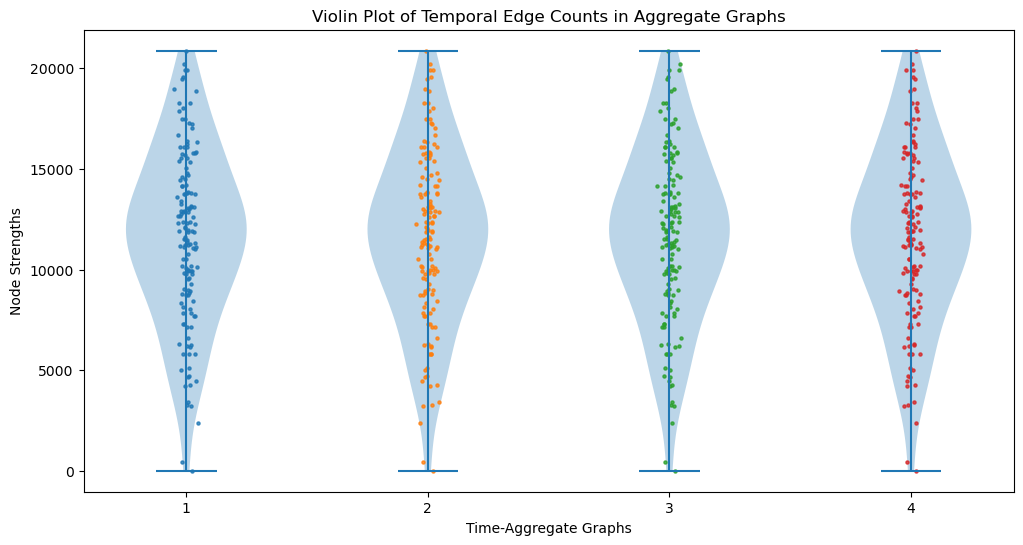

In [30]:
plt.figure(figsize=(12, 6))

# Create violin plot
plt.violinplot(AGGs_degrees_w1)

# Add jitter to the x-coordinates and plot individual points as circles
for i, degs in enumerate(AGGs_degrees_w1):
    np.random.seed(0)
    jittered_x = np.random.normal(i + 1, 0.02, size=len(degs))
    plt.scatter(jittered_x, degs, alpha=0.8,s=5, marker='o')  # 'o' is the marker symbol for circles

title = 'Violin Plot of Temporal Edge Counts in Aggregate Graphs'
plt.title(title)
# plt.title('Violin Plot of Temporal Edge Counts in Aggregate Graphs')
plt.xlabel('Time-Aggregate Graphs')
plt.ylabel('Node Strengths')
plt.xticks(ticks=np.arange(1, len(AGGs_degrees_w1) + 1), labels=[f'{i + 1}' for i in range(len(AGGs_degrees_w1))])

path = f'{args.path_prefix}{args.date}_{args.npy_file}_AGG_topo_strengths_{args.shuffle}_ct_violin_pts_{args.network_type}_dis{args.district}.png'
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

### Plot aggregate strength
- Since the weights are all set to 1, edge swapping doesn't change the aggregate strengths
- But, can't use this richness property since it is changed with weight decorrelation, which is used with the WTRC

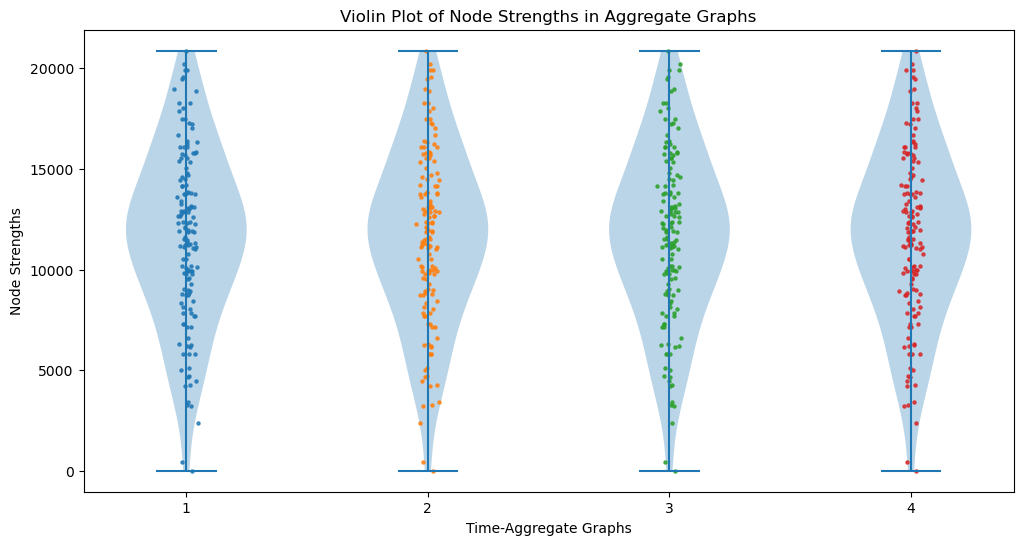

In [31]:
plt.figure(figsize=(12, 6))
plt.violinplot(AGGs_degrees)
# Add jitter to the x-coordinates and plot individual points as circles
for i, degs in enumerate(AGGs_degrees):
    np.random.seed(0)
    jittered_x = np.random.normal(i + 1, 0.02, size=len(degs))
    plt.scatter(jittered_x, degs, alpha=0.8,s=5, marker='o')  # 'o' is the marker symbol for circles

title = 'Violin Plot of Node Strengths in Aggregate Graphs'    
plt.title(title)
plt.xlabel('Time-Aggregate Graphs')
plt.ylabel('Node Strengths')
plt.xticks(ticks=np.arange(1, len(AGGs_degrees) + 1), labels=[f'{i + 1}' for i in range(len(AGGs_degrees))])

path = f'{args.path_prefix}{args.date}_{args.npy_file}_AGG_strengths_{args.shuffle}_ct_violin_pts_{args.network_type}_dis{args.district}.png'
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

### Plot degree in the aggregate graph
- This property is changed by edge swapping, so it can't be used to differentiate the WTRC and the TTRC

In [32]:
AGGs_list_w1d = []
AGGs_degrees_w1d = []
for tup in graphs_array_w1:
    graphs_list_ = tup[0] # can't use AGG bc it's just a copy of the original, as of 1/11/24
    AGG_ = nx.Graph()
    for gt in graphs_list_:
        AGG_ = update_edge_weights(AGG_, gt)
    AGGs_list_w1d.append(AGG_)
    degrees_w1d = [int(d) for n, d in AGG_.degree()]
    AGGs_degrees_w1d.append(degrees_w1d)

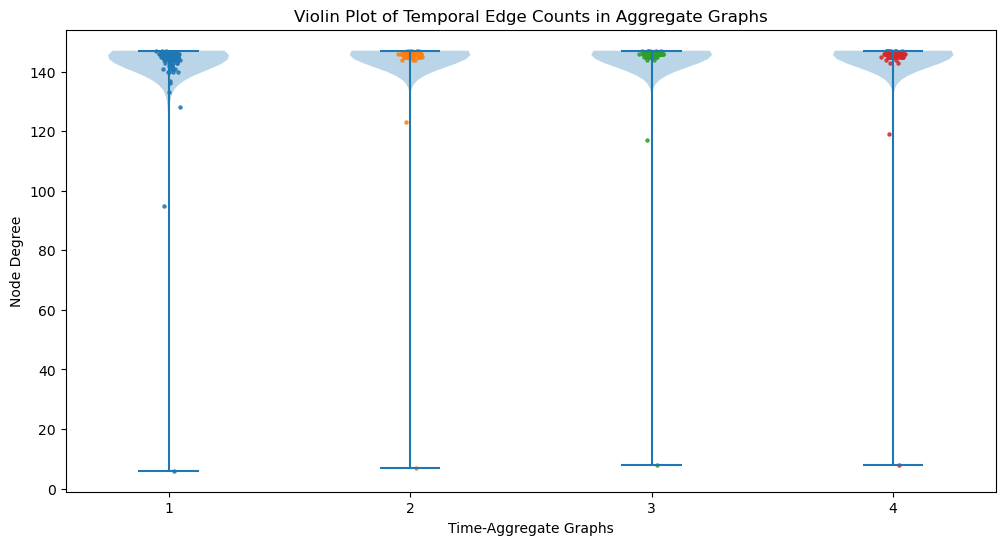

In [33]:
plt.figure(figsize=(12, 6))

# Create violin plot
plt.violinplot(AGGs_degrees_w1d)

# Add jitter to the x-coordinates and plot individual points as circles
for i, degs in enumerate(AGGs_degrees_w1d):
    np.random.seed(0)
    jittered_x = np.random.normal(i + 1, 0.02, size=len(degs))
    plt.scatter(jittered_x, degs, alpha=0.8,s=5, marker='o')  # 'o' is the marker symbol for circles

title = 'Violin Plot of Temporal Edge Counts in Aggregate Graphs'
plt.title(title)
# plt.title('Violin Plot of Temporal Edge Counts in Aggregate Graphs')
plt.xlabel('Time-Aggregate Graphs')
plt.ylabel('Node Degree')
plt.xticks(ticks=np.arange(1, len(AGGs_degrees_w1d) + 1), labels=[f'{i + 1}' for i in range(len(AGGs_degrees_w1d))])

path = f'{args.path_prefix}{args.date}_{args.npy_file}_AGG_deg_{args.shuffle}_ct_violin_pts_{args.network_type}_dis{args.district}.png'
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()